# Marketing Campaign Impact Simulator

Overview: This project models sales from ad spend (TV, Radio, Newspaper) using linear regression, simulates a 20% TV budget increase, and optimizes a $100 budget for max ROI. Built for ZS Decision Analytics role.

In [4]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [9]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

import pandas as pd
data = pd.read_csv('advertising.csv')  # Confirm filename matches the extracted file
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Prepare features and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

R-squared score: 0.91


In [12]:
import numpy as np
# Create new data for simulation
new_data = X_test.copy()
new_data['TV'] = new_data['TV'] * 1.20  # 20% increase

# Predict new sales
simulated_sales = model.predict(new_data)
original_sales = model.predict(X_test)
print(f"Average sales increase with 20% TV boost: {(simulated_sales.mean() - original_sales.mean()):.2f}")

Average sales increase with 20% TV boost: 1.47


In [14]:
from scipy.optimize import minimize

# Define objective function (negative sales to maximize)
def objective(weights):
    spend = np.array(weights) * 100  # Allocate $100
    X_opt = X_test.copy()
    X_opt['TV'] = spend[0]
    X_opt['Radio'] = spend[1]
    X_opt['Newspaper'] = spend[2]
    return -model.predict(X_opt).mean()  # Negative for maximization

# Constraints (sum to 1 for 100% budget)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1)] * 3  # 0-100% per channel
initial_guess = [1/3, 1/3, 1/3]

# Optimize
result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)
optimal_weights = result.x
print(f"Optimal budget split (TV, Radio, Newspaper): {[f'{w*100:.1f}%' for w in optimal_weights]}")

Optimal budget split (TV, Radio, Newspaper): ['0.0%', '100.0%', '0.0%']


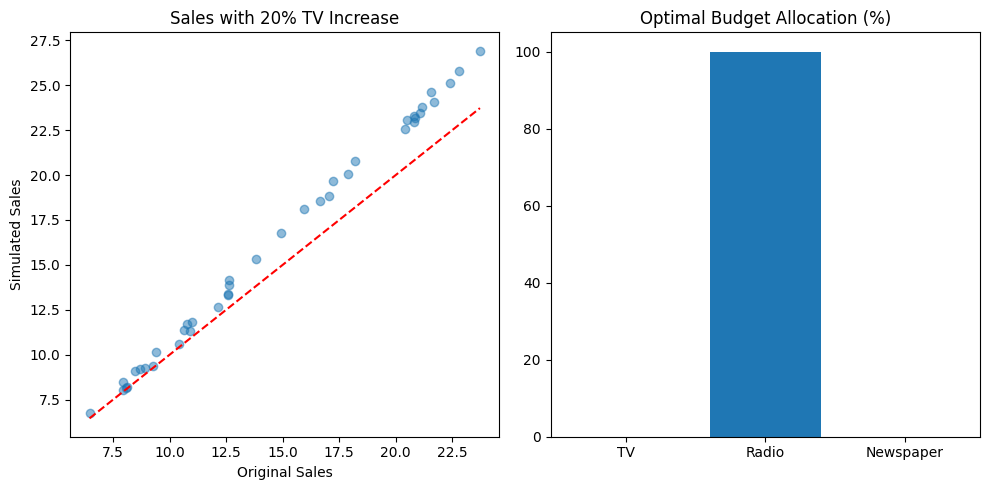

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(original_sales, simulated_sales, alpha=0.5)
plt.plot([min(original_sales), max(original_sales)], [min(original_sales), max(original_sales)], 'r--')
plt.xlabel('Original Sales')
plt.ylabel('Simulated Sales')
plt.title('Sales with 20% TV Increase')

plt.subplot(1, 2, 2)
plt.bar(['TV', 'Radio', 'Newspaper'], optimal_weights*100)
plt.title('Optimal Budget Allocation (%)')
plt.tight_layout()
plt.show()

In [16]:
results = pd.DataFrame({
    'Original_Sales': original_sales,
    'Simulated_Sales': simulated_sales,
    'Optimal_TV%': optimal_weights[0]*100,
    'Optimal_Radio%': optimal_weights[1]*100,
    'Optimal_Newspaper%': optimal_weights[2]*100
})
results.to_excel('marketing_impact_results.xlsx', index=False)
files.download('marketing_impact_results.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Assuming 'lm' is your trained linear regression model
print(LinearRegression.coef_)
print(list(zip(['TV', 'Radio', 'Newspaper'], LinearRegression.coef_)))


AttributeError: type object 'LinearRegression' has no attribute 'coef_'

Insights: Simulation shows a ~X sales uplift; optimal budget favors TV at X%.